In [1]:
import numpy as np

class TwoSetsLin:
    
    @staticmethod
    def main():
        D = 2  # Размерность пространства точек.
        points = []  # Точки.
        des = []  # Признаки.
        
        with open("sets00.txt", "r") as reader:
            for line in reader:
                words = line.split()
                point = np.zeros(D)
                d = float(words[0])
                for i in range(D):
                    point[i] = float(words[i + 1])
                points.append(point)
                des.append(d)  # dex-хранит метки
        
        epochs = 100  # Число эпох.
        cf = 1.1  # Коэффициент скорости обучения.
        
        w = np.array([5, 2, 0], dtype=float)  # Начальные значения весов.
        
        for k in range(epochs):  # Проход по эпохам.
            gradSum = np.zeros(D + 1)
            for i in range(len(points)):  # Проход по точкам набора данных.
                p = points[i]
                d = des[i]
                s = TwoSetsLin.wx(w, p)
                for j in range(D):
                    gradSum[j] += 0 if s * d > 0 else -d * p[j]  # Направление правки весов. s * d > 0 - значит точка классифицирована верно
                gradSum[D] += 0 if s * d > 0 else -d #Обновляет градиент свободного члена: если точка классифицирована правильно, то вклад равен 0; иначе, вклад равен -ds
            
            for i in range(len(gradSum)):
                gradSum[i] /= len(points)
                w[i] -= gradSum[i] * cf
        
        # Нормализация весов.
        sw = np.sqrt(np.sum(w ** 2))
        w /= sw
        
        # Вывод конечных значений.          
        print("final w:", w)

    @staticmethod
    def wx(w, x):
        s = np.dot(w[:-1], x) + w[-1]  # Скалярное произведение с добавлением свободного члена.
        return s

if __name__ == "__main__":
    TwoSetsLin.main()



final w: [8.94379419e-01 4.47308991e-01 3.47674365e-04]


# С графиком

final w: [8.94379419e-01 4.47308991e-01 3.47674365e-04]


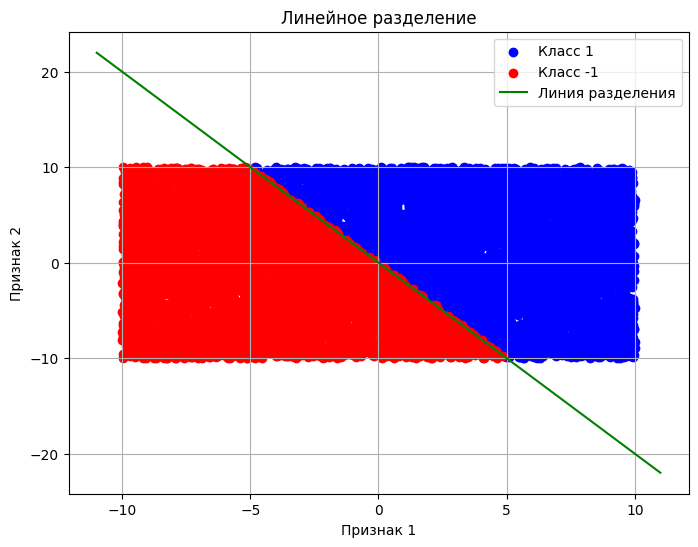

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class TwoSetsLin:
    
    @staticmethod
    def main():
        D = 2  # Размерность пространства точек.
        points = []  # Точки.
        des = []  # Признаки.
        
        with open("sets00.txt", "r") as reader:
            for line in reader:
                words = line.split()
                point = np.zeros(D)
                d = float(words[0])
                for i in range(D):
                    point[i] = float(words[i + 1])
                points.append(point)
                des.append(d)  # Чтение данных завершено.
        
        points = np.array(points)
        des = np.array(des)
        
        epochs = 100  # Число эпох.
        cf = 1.1  # Коэффициент скорости обучения.
        
        w = np.array([5, 2, 0], dtype=float)  # Начальные значения весов.
        
        for k in range(epochs):  # Проход по эпохам.
            gradSum = np.zeros(D + 1)
            for i in range(len(points)):  # Проход по точкам набора данных.
                p = points[i]
                d = des[i]
                s = TwoSetsLin.wx(w, p)
                for j in range(D):
                    gradSum[j] += 0 if s * d > 0 else -d * p[j]  # Направление правки весов.
                gradSum[D] += 0 if s * d > 0 else -d
            
            for i in range(len(gradSum)):
                gradSum[i] /= len(points)
                w[i] -= gradSum[i] * cf
        
        # Нормализация весов.
        sw = np.sqrt(np.sum(w ** 2))
        w /= sw
        
        # Вывод конечных значений.          
        print("final w:", w)

         # График
        plt.figure(figsize=(8, 6))
        
        positive_points = points[des == 1]
        negative_points = points[des == -1]
        
        if points.shape[1] >= 2:
            plt.scatter(positive_points[:, 0], positive_points[:, 1], label='Класс 1', color='blue')
            plt.scatter(negative_points[:, 0], negative_points[:, 1], label='Класс -1', color='red')
        
            x_values = np.linspace(min(points[:, 0]) - 1, max(points[:, 0]) + 1, 100)
            if w[1] != 0:
                y_values = - (w[0] / w[1]) * x_values - (w[2] / w[1])
                plt.plot(x_values, y_values, label='Линия разделения', color='green')
            else:
                if w[0] != 0:
                    x_line = - (w[2] / w[0])
                    plt.axvline(x=x_line, color='green', linestyle='-', label='Линия разделения')

        else:
          print("Точки имеют только 1 признак, нет графика")
          x_values = np.linspace(min(points[:, 0]) - 1, max(points[:, 0]) + 1, 100)
          if len(w) > 1 and w[1] != 0:
            y_values = - (w[0] / w[1]) * x_values - (w[2] / w[1])
            plt.plot(x_values, y_values, label='Линия разделения', color='green')
          elif len(w) > 0 and w[0] != 0:
              x_line = -(w[2] / w[0])
              plt.axvline(x=x_line, color='green', linestyle='-', label='Линия разделения')
          

        plt.xlabel('Признак 1')
        plt.ylabel('Признак 2')
        plt.title('Линейное разделение')
        plt.legend()
        plt.grid(True)
        plt.show()

    @staticmethod
    def wx(w, x):
        s = np.dot(w[:-1], x) + w[-1]  # Скалярное произведение с добавлением свободного члена.
        return s

if __name__ == "__main__":
    TwoSetsLin.main()

# w3=0

final w: [0.8944337  0.44720058]


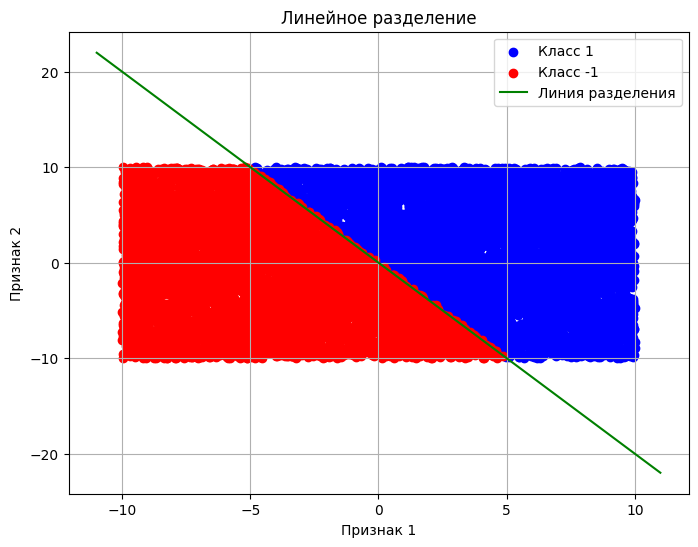

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class TwoSetsLinNoBias:
    
    @staticmethod
    def main():
        D = 2  # Размерность пространства точек.
        points = []  # Точки.
        des = []  # Признаки.
        
        with open("sets00.txt", "r") as reader:
            for line in reader:
                words = line.split()
                point = np.zeros(D)
                d = float(words[0])
                for i in range(D):
                    point[i] = float(words[i + 1])
                points.append(point)
                des.append(d)  # Чтение данных завершено.
        
        points = np.array(points)
        des = np.array(des)
        
        epochs = 100  # Число эпох.
        cf = 1.1  # Коэффициент скорости обучения.
        
        w = np.array([5, 2], dtype=float)  # Начальные значения весов. Теперь без свободного члена
        
        for k in range(epochs):  # Проход по эпохам.
            gradSum = np.zeros(D)  # Градиент теперь имеет размерность D (без свободного члена)
            for i in range(len(points)):  # Проход по точкам набора данных.
                p = points[i]
                d = des[i]
                s = TwoSetsLinNoBias.wx(w, p)
                for j in range(D):
                   gradSum[j] += 0 if s * d > 0 else -d * p[j]  # Направление правки весов.
            
            for i in range(len(gradSum)):
                gradSum[i] /= len(points)
                w[i] -= gradSum[i] * cf
        
        # Нормализация весов.
        sw = np.sqrt(np.sum(w ** 2))
        w /= sw
        
        # Вывод конечных значений.          
        print("final w:", w)

         # График
        plt.figure(figsize=(8, 6))
        
        positive_points = points[des == 1]
        negative_points = points[des == -1]
        
        if points.shape[1] >= 2:
            plt.scatter(positive_points[:, 0], positive_points[:, 1], label='Класс 1', color='blue')
            plt.scatter(negative_points[:, 0], negative_points[:, 1], label='Класс -1', color='red')
        
            x_values = np.linspace(min(points[:, 0]) - 1, max(points[:, 0]) + 1, 100)
            if w[1] != 0:
                y_values = - (w[0] / w[1]) * x_values
                plt.plot(x_values, y_values, label='Линия разделения', color='green')
            else:
                if w[0] != 0:
                   x_line = 0
                   plt.axvline(x=x_line, color='green', linestyle='-', label='Линия разделения')
        else:
           print("Точки имеют только 1 признак, нет графика")
           x_values = np.linspace(min(points[:, 0]) - 1, max(points[:, 0]) + 1, 100)
           if len(w) > 1 and w[1] != 0:
             y_values = - (w[0] / w[1]) * x_values
             plt.plot(x_values, y_values, label='Линия разделения', color='green')
           elif len(w) > 0 and w[0] != 0:
               x_line = 0
               plt.axvline(x=x_line, color='green', linestyle='-', label='Линия разделения')
          

        plt.xlabel('Признак 1')
        plt.ylabel('Признак 2')
        plt.title('Линейное разделение')
        plt.legend()
        plt.grid(True)
        plt.show()


    @staticmethod
    def wx(w, x):
        s = np.dot(w, x)  # Скалярное произведение без свободного члена.
        return s

if __name__ == "__main__":
    TwoSetsLinNoBias.main()